In [1]:
#This notebook will be implement Maxent CE dynamic gradient ascent to calculate nash eq. for dynamic 1v1's
#These games must be zero sum!

#Here will construct our aysmmetric matrix from csv file and map it to our action space
import numpy as np
import csv
np.set_printoptions(precision=3, suppress=True)


#This will be our meta_game action space
p1_space = []
p2_space = []

file = 'NeutralMatchup.csv'
#We will survey the csv file to fill our action space
with open(file, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        if row['Player1'] not in p1_space:
            p1_space.append(row['Player1'])
        
        if row['Player2'] not in p2_space:
            p2_space.append(row['Player2'])

#Create action_to_index utility dictionary
index = 0
p1_to_index = {}
for action in p1_space:
    p1_to_index[action] = index
    index += 1
    
index = 0
p2_to_index = {}
for action in p2_space:
    p2_to_index[action] = index
    index += 1

#We will generate our dual variables, keep in mind each player has different options
dual_variables = {}

#Joint action space
p1_joint = []
for i in range(len(p1_space)):
    for j in range(len(p1_space)):
        if j != i:
            joint_action = (1, p1_space[i], p1_space[j])
            p1_joint.append(joint_action)
            dual_variables[joint_action] = 0

p2_joint = []
for i in range(len(p2_space)):
    for j in range(len(p2_space)):
        if j != i:
            joint_action = (2, p2_space[i], p2_space[j])
            p2_joint.append(joint_action)
            dual_variables[joint_action] = 0
            
print(dual_variables)
print(p1_joint)
print(p2_joint)
#Generate union action space
action_space = []
for action in p1_space:
    action_space.append(action)

for action in p2_space:
    action_space.append(action)

{(1, 'Nair', 'PBair'): 0, (1, 'Nair', 'PDair'): 0, (1, 'Nair', 'Dair'): 0, (1, 'Nair', 'Uair'): 0, (1, 'Nair', 'Knee'): 0, (1, 'Nair', 'DB'): 0, (1, 'Nair', 'DG'): 0, (1, 'Nair', 'SH-WL-B'): 0, (1, 'Nair', 'WD-D'): 0, (1, 'PBair', 'Nair'): 0, (1, 'PBair', 'PDair'): 0, (1, 'PBair', 'Dair'): 0, (1, 'PBair', 'Uair'): 0, (1, 'PBair', 'Knee'): 0, (1, 'PBair', 'DB'): 0, (1, 'PBair', 'DG'): 0, (1, 'PBair', 'SH-WL-B'): 0, (1, 'PBair', 'WD-D'): 0, (1, 'PDair', 'Nair'): 0, (1, 'PDair', 'PBair'): 0, (1, 'PDair', 'Dair'): 0, (1, 'PDair', 'Uair'): 0, (1, 'PDair', 'Knee'): 0, (1, 'PDair', 'DB'): 0, (1, 'PDair', 'DG'): 0, (1, 'PDair', 'SH-WL-B'): 0, (1, 'PDair', 'WD-D'): 0, (1, 'Dair', 'Nair'): 0, (1, 'Dair', 'PBair'): 0, (1, 'Dair', 'PDair'): 0, (1, 'Dair', 'Uair'): 0, (1, 'Dair', 'Knee'): 0, (1, 'Dair', 'DB'): 0, (1, 'Dair', 'DG'): 0, (1, 'Dair', 'SH-WL-B'): 0, (1, 'Dair', 'WD-D'): 0, (1, 'Uair', 'Nair'): 0, (1, 'Uair', 'PBair'): 0, (1, 'Uair', 'PDair'): 0, (1, 'Uair', 'Dair'): 0, (1, 'Uair', 'Knee

In [2]:
#Here will construct our aysmmetric matrix from csv file and map it to our action space
import numpy as np
import csv
np.set_printoptions(precision=3, suppress=True)

with open(file, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    #Create two dictionaries to keep track of wins and losses over matches
    matches = []
    wins_i = {}
    wins_j = {}
    
    for row in csv_reader:
        i = row["Player1"]
        j = row["Player2"]
        match = (i, j)
        win_i = float(row["Wins"])
        win_j = float(row["Loss"])
        
        if (i in p1_space) and (j in p2_space):
            if match in matches:
                wins_i[match] += win_i
                wins_j[match] += win_j
            else:
                matches.append(match)
                wins_i[match] = win_i
                wins_j[match] = win_j

#Create payoff matrix
M = np.full((len(p1_space), len(p2_space)), 0.5)
matchup = [[None]*len(p2_space) for _ in range(len(p1_space))]
for match, win_i in wins_i.items():
    win_j = wins_j[match]
    payout = win_i/(win_i + win_j)
    print(match, ": ", payout)
    name_i, name_j = match
    matchup[p1_to_index[name_i]][p2_to_index[name_j]] = match
    
    #Soften payout
    epsilon = 0.01
    if payout == 0.0:
        payout += epsilon
    elif payout == 1.0:
        payout -= epsilon
    
    M[p1_to_index[name_i]][p2_to_index[name_j]] = payout
    

#Before logit space
print(M)
#Create logit space
M = np.log(M/(1-M))
print(M)
for row in matchup:
    print(row)

('Nair', 'Nair') :  0.4
('PBair', 'Nair') :  0.5
('PDair', 'Nair') :  0.4
('Dair', 'Nair') :  0.4
('Uair', 'Nair') :  0.6
('Knee', 'Nair') :  0.5
('DB', 'Nair') :  0.6
('DG', 'Nair') :  0.4
('SH-WL-B', 'Nair') :  0.6
('WD-D', 'Nair') :  0.4
('Nair', 'DB') :  0.6
('PBair', 'DB') :  0.4
('PDair', 'DB') :  0.4
('Dair', 'DB') :  0.6
('Uair', 'DB') :  0.4
('Knee', 'DB') :  0.6
('DB', 'DB') :  0.5
('DG', 'DB') :  0.6
('SH-WL-B', 'DB') :  0.5
('WD-D', 'DB') :  0.5
('Nair', 'Fair') :  0.4
('PBair', 'Fair') :  0.6
('PDair', 'Fair') :  0.4
('Dair', 'Fair') :  0.4
('Uair', 'Fair') :  0.4
('Knee', 'Fair') :  0.4
('DB', 'Fair') :  0.6
('DG', 'Fair') :  0.4
('SH-WL-B', 'Fair') :  0.6
('WD-D', 'Fair') :  0.4
('Nair', 'Dtilt') :  0.4
('PBair', 'Dtilt') :  0.4
('PDair', 'Dtilt') :  0.6
('Dair', 'Dtilt') :  0.6
('Uair', 'Dtilt') :  0.4
('Knee', 'Dtilt') :  0.4
('DB', 'Dtilt') :  0.5
('DG', 'Dtilt') :  0.4
('SH-WL-B', 'Dtilt') :  0.5
('WD-D', 'Dtilt') :  0.5
('Nair', 'DG') :  0.6
('PBair', 'DG') :  0.4
(

In [5]:
def payoff(action_1, action_2):
    return M[p1_to_index[action_1]][p2_to_index[action_2]]

def payoff_gain(alt_action, action, player=1):
    #Calculate M(alt_action, action') & M(action, action')
    diff = 0 
    #opponents action space
    space = p2_space
    if player == 2:
        space = p1_space
        
    for action_op in space:
        if player == 1:
            M_alt = payoff(alt_action, action_op)
            M_act = payoff(action, action_op)
            diff += M_alt - M_act
        else:
            M_alt = -payoff(action_op, alt_action)
            M_act = -payoff(action_op, action)
            diff += M_alt - M_act
    return diff

#Return Z(lambda) of dual variables
def Z(dv):
    sum_one = 0
    sum_two = 0
    
    #Split the sums
    for i in range(len(p1_space)):
        action = p1_space[i]
        loop_sum = 0
        for j in range(len(p1_space)):
            if j != i:
                loop_sum += dv[(1, action, p1_space[j])] * payoff_gain(p1_space[j], action, player=1)
        sum_one += np.exp(-loop_sum)
    
    for i in range(len(p2_space)):
        action = p2_space[i]
        loop_sum = 0
        for j in range(len(p2_space)):   
            if j != i:
                loop_sum += dv[(2, action, p2_space[j])] * payoff_gain(p2_space[j], action, player=2)
        sum_two += np.exp(-loop_sum)
        
    return sum_one, sum_two

#Get mixed strategy from dual variables
def P(dv, a, player=1):
    sum_one = 0
    if player == 1:
        for aPrime in p1_space:      
            if a != aPrime:
                sum_one += dv[(1, a, aPrime)]*payoff_gain(aPrime, a, player=1)
    elif player == 2:
        for aPrime in p2_space:      
            if a != aPrime:
                sum_one += dv[(2, a, aPrime)]*payoff_gain(aPrime, a, player=2)
    
    Z1, Z2 = Z(dv)
    z = Z1
    if player == 2:
        z = Z2
        
    log_P = -sum_one - np.log(z)
    return np.exp(log_P)

In [6]:
#Test our functions
print(payoff("DG", "Fair"))
print(payoff_gain("Knee", "DG", player=1))
print(P(dual_variables, "Fair", player=2))

-0.4054651081081643
-0.4054651081081643
0.11111111111111109


In [7]:
#Regret Calculation
def regret_both(dv, action, action_prime, player=1):
    P_a = P(dv, action, player=player)
    p = 0
    n = 0
    
    if player == 1:
        for p2_action in p2_space:
            P_p2 = P(dv, p2_action, player=2)
            p_gain = payoff(action_prime, p2_action) - payoff(action, p2_action)

            p += (P_a*P_p2) * max(0, p_gain) #Force falcon to always lose
            n += (P_a*P_p2) * max(0, -p_gain)
    else:
        for p1_action in p1_space:
            P_p1 = P(dv, p1_action, player=1)
            p_gain = -(payoff(p1_action, action_prime) - payoff(p1_action, action)) #Payoff is negative of falcon's

            p += (P_a*P_p1) * max(0, p_gain)
            n += (P_a*P_p1) * max(0, -p_gain)
        
    return p, n

In [8]:
print(regret_both(dual_variables, "Knee", "Nair", player=1))
pos, neg = regret_both(dual_variables, "Knee", "Nair", player=1)

step = (1/6)*((pos/(neg + pos)) - (0.5))
print(step)
print(step*payoff_gain("Knee", "Nair", player=1))
print(step*payoff_gain("Nair", "Knee", player=1))

(0.00901033573573698, 0.01802067147147396)
-0.02777777777777778
-0.022525839339342463
0.022525839339342463


In [9]:
# Calculate lower bound c

def abs_gain(action, action_prime, player=1):
    total = 0
    if player == 1:
        for p2_action in p2_space:
            p_gain = abs(payoff(action_prime, p2_action) - payoff(action, p2_action))
            total += p_gain
    else:
        for p1_action in p1_space:
            p_gain = abs((-payoff(p1_action, action_prime)) - (-payoff(p1_action, action)))
            total += p_gain
    
    return total
        
def lower_bound_c():
    bound = 0
    for action in p1_space:
        for action_prime in p1_space:
            a_gain = abs_gain(action, action_prime, player=1)
            bound += a_gain 
    
    for action in p2_space:
        for action_prime in p2_space:
            a_gain = abs_gain(action, action_prime, player=2)
            bound += a_gain
            
    return bound 

In [10]:
print(abs_gain("PBair", "Knee", player=1))
print(lower_bound_c())

3.649185972973478
580.6260348108912


In [11]:
#Dynamic Step-Size Gradient Ascent from Section 4.1 of 
#http://rob.schapire.net/papers/correl-equil.pdf

from tqdm import tqdm 

def sort_dictionary(d):
    sorted_x = sorted(d.items(), key=lambda kv: kv[1])
    return sorted_x

def plot(dv):
    probs1 = {}
    probs2 = {}
    for action in p1_space:
        probs1[action] = P(dv,action,player=1)
        
    for action in p2_space:
        probs2[action] = P(dv,action,player=2)
    
    import matplotlib.pyplot as plt; plt.rcdefaults()
    import numpy as np
    import matplotlib.pyplot as plt

    sort1 = sort_dictionary(probs1)
    sort2 = sort_dictionary(probs2)
    #For tier lists
    objects1 = []
    performance1 = []
    objects2 = []
    performance2 = []
    
    for action, value in sort1:
        objects1.append(action)
        performance1.append(value)
    
    for action, value in sort2:
        objects2.append(action)
        performance2.append(value)


    y_pos = np.arange(len(objects1))
    plt.barh(y_pos, performance1, align="center")
    plt.yticks(y_pos, objects1)
    plt.xlabel('Density')
    plt.ylabel('Strategies')
    plt.title('Falcon Policy')

    plt.show()
    
    y_pos = np.arange(len(objects2))
    plt.barh(y_pos, performance2, align="center")
    plt.yticks(y_pos, objects2)
    plt.xlabel('Density')
    plt.ylabel('Strategies')
    plt.title('Marth Policy')

    plt.show()

#Not log_grad.. dynamic gradient ascent avoids divide by 0
def log_grad_descent(dv, rounds=10, verbose=True, gamma=0.0):
    c= lower_bound_c()
    
    for it in tqdm(range(rounds)):
        step_dict = {}
        for pair in p1_joint:
            _, action, action_prime = pair
            r_pos, r_neg = regret_both(dv, action, action_prime, player=1)

            #print("Joint Action: ", (action, action_prime))
            #print("r_pos: ", r_pos)
            #print("r_neg: ", r_neg)
            
            reg = gamma*dv[pair]
            term = ((r_pos - reg)/(r_pos + r_neg)) - (1/2)
            #ratio = r_pos/r_neg
            #ratio = np.clip(ratio, 0.1, 10)
            #term = 0.5* np.log(ratio)


            step = (1/c)*term
            

            step_dict[pair] = step
        
        for pair in p2_joint:
            _, action, action_prime = pair
            r_pos, r_neg = regret_both(dv, action, action_prime, player=2)

            #print("Joint Action: ", (action, action_prime))
            #print("r_pos: ", r_pos)
            #print("r_neg: ", r_neg)

            reg = gamma*dv[pair]
            term = ((r_pos - reg)/(r_pos + r_neg)) - (1/2)
            
            #ratio = r_pos/r_neg
            #ratio = np.clip(ratio, 0.1, 10)
            #term = 0.5* np.log(ratio)


            step = (1/c)*term

            step_dict[pair] = step
                
        for pair in p1_joint:
            dv[pair] = max(0, dv[pair] + step_dict[pair])
        
        for pair in p2_joint:
            dv[pair] = max(0, dv[pair] + step_dict[pair])
                
        if verbose:
            print("Iteration ", it)
            plot(dv)

In [13]:
#We will generate our dual variables, keep in mind each player has different options
dual_variables = {}
for i in range(len(p1_space)):
    for j in range(len(p1_space)):
        if j != i:
            joint_action = (1, p1_space[i], p1_space[j])
            dual_variables[joint_action] = 0
            
for i in range(len(p2_space)):
    for j in range(len(p2_space)):
        if j != i:
            joint_action = (2, p2_space[i], p2_space[j])
            dual_variables[joint_action] = 0
        
log_grad_descent(dual_variables, verbose=False, rounds=100, gamma=0.0)


  0%|          | 0/100 [00:00<?, ?it/s]/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars

100%|██████████| 100/100 [06:40<00:00,  3.98s/it]

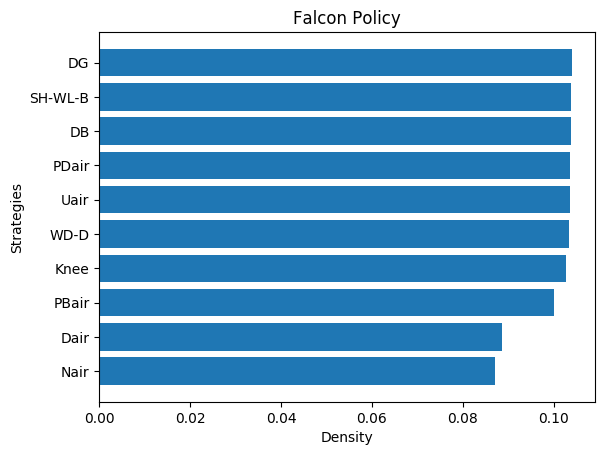

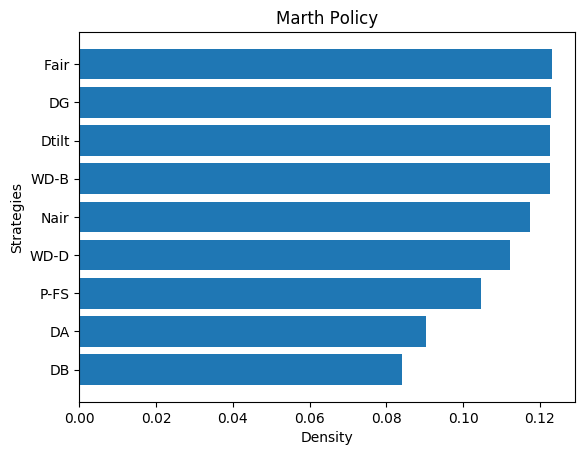

In [16]:
plot(dual_variables)


In [15]:
#Create policies
f_policy = []
for f_action in p1_space:
    f_policy.append(P(dual_variables, f_action, player=1))

m_policy = []
for m_action in p2_space:
    m_policy.append(P(dual_variables, m_action, player=2))

f_policy = f_policy/np.sum(f_policy)
m_policy = m_policy/np.sum(m_policy)

print(f_policy)
print(m_policy)

[0.087 0.1   0.104 0.089 0.104 0.103 0.104 0.104 0.104 0.103]
[0.117 0.084 0.123 0.123 0.123 0.123 0.112 0.09  0.105]


In [19]:
#Create a Game where Marth has 5 lives and Falcon has 7
#Melee Theory: Falcon "loses" neutral, but has a better punish game, hence the 5 and 7
m_wins = 0
f_wins = 0
rounds = 0
while m_wins < 7 and f_wins < 5:
    rounds += 1
    print("Round ", rounds)
    print("Falcon wins: ", f_wins, " Marth wins: ", m_wins)
    f_action = np.random.choice(p1_space, p=f_policy)
    m_action = np.random.choice(p2_space, p=m_policy)
    print("Falcon Selected: ", f_action)
    print("Marth Selected: ", m_action)
    
    result = payoff(f_action, m_action)
    print("Payoff: ", result)
    
    if result >= 0.4:
        f_wins += 1
        print("Falcon punishes Marth")
    elif result > 0.0:
        f_wins += 0.1
        print("Falcon gains slight advantage")
    elif result <= -0.4:
        m_wins += 1
        print("Marth punishes Falcon")
    elif result < 0.0:
        m_wins += 0.1
        print("Marth gains slight advantage")
    else:
        print("Neutral Reset")
        

Round  1
Falcon wins:  0  Marth wins:  0
Falcon Selected:  DG
Marth Selected:  Fair
Payoff:  -0.4054651081081643
Marth punishes Falcon
Round  2
Falcon wins:  0  Marth wins:  1
Falcon Selected:  SH-WL-B
Marth Selected:  P-FS
Payoff:  -0.4054651081081643
Marth punishes Falcon
Round  3
Falcon wins:  0  Marth wins:  2
Falcon Selected:  WD-D
Marth Selected:  Nair
Payoff:  -0.4054651081081643
Marth punishes Falcon
Round  4
Falcon wins:  0  Marth wins:  3
Falcon Selected:  SH-WL-B
Marth Selected:  Dtilt
Payoff:  0.0
Neutral Reset
Round  5
Falcon wins:  0  Marth wins:  3
Falcon Selected:  Uair
Marth Selected:  Dtilt
Payoff:  -0.4054651081081643
Marth punishes Falcon
Round  6
Falcon wins:  0  Marth wins:  4
Falcon Selected:  PDair
Marth Selected:  P-FS
Payoff:  0.4054651081081642
Falcon punishes Marth
Round  7
Falcon wins:  1  Marth wins:  4
Falcon Selected:  PDair
Marth Selected:  WD-B
Payoff:  -0.4054651081081643
Marth punishes Falcon
Round  8
Falcon wins:  1  Marth wins:  5
Falcon Selected: 

In [20]:
for lm in dual_variables:
    print(lm)

(1, 'Nair', 'PBair')
(1, 'Nair', 'PDair')
(1, 'Nair', 'Dair')
(1, 'Nair', 'Uair')
(1, 'Nair', 'Knee')
(1, 'Nair', 'DB')
(1, 'Nair', 'DG')
(1, 'Nair', 'SH-WL-B')
(1, 'Nair', 'WD-D')
(1, 'PBair', 'Nair')
(1, 'PBair', 'PDair')
(1, 'PBair', 'Dair')
(1, 'PBair', 'Uair')
(1, 'PBair', 'Knee')
(1, 'PBair', 'DB')
(1, 'PBair', 'DG')
(1, 'PBair', 'SH-WL-B')
(1, 'PBair', 'WD-D')
(1, 'PDair', 'Nair')
(1, 'PDair', 'PBair')
(1, 'PDair', 'Dair')
(1, 'PDair', 'Uair')
(1, 'PDair', 'Knee')
(1, 'PDair', 'DB')
(1, 'PDair', 'DG')
(1, 'PDair', 'SH-WL-B')
(1, 'PDair', 'WD-D')
(1, 'Dair', 'Nair')
(1, 'Dair', 'PBair')
(1, 'Dair', 'PDair')
(1, 'Dair', 'Uair')
(1, 'Dair', 'Knee')
(1, 'Dair', 'DB')
(1, 'Dair', 'DG')
(1, 'Dair', 'SH-WL-B')
(1, 'Dair', 'WD-D')
(1, 'Uair', 'Nair')
(1, 'Uair', 'PBair')
(1, 'Uair', 'PDair')
(1, 'Uair', 'Dair')
(1, 'Uair', 'Knee')
(1, 'Uair', 'DB')
(1, 'Uair', 'DG')
(1, 'Uair', 'SH-WL-B')
(1, 'Uair', 'WD-D')
(1, 'Knee', 'Nair')
(1, 'Knee', 'PBair')
(1, 'Knee', 'PDair')
(1, 'Knee', 'Dair

In [21]:
#Estimate matchup percentage
from tqdm import tqdm
def simul_game(games):
    
    w = 0
    for _ in tqdm(range(games)):
        m_wins = 0
        f_wins = 0
        while m_wins < 8 and f_wins < 5:
            f_action = np.random.choice(p1_space, p=f_policy)
            m_action = np.random.choice(p2_space, p=m_policy)
            result = payoff(f_action, m_action)

            if result >= 0.4:
                f_wins += 1
            elif result > 0.0:
                f_wins += 0.1
            elif result <= -0.4:
                m_wins += 1
            elif result < 0.0:
                m_wins += 0.1
        
        if f_wins >= 5:
            w += 1
    
    return w/games

def simul_neutral(games):
    avg_payoff = 0 
    for _ in tqdm(range(games)):
        f_action = np.random.choice(p1_space, p=f_policy)
        m_action = np.random.choice(p2_space, p=m_policy)
        result = payoff(f_action, m_action)
        avg_payoff += result
    
    return avg_payoff/games

In [22]:
print(simul_game(10000))


100%|██████████| 10000/10000 [00:12<00:00, 782.00it/s]

0.498


In [28]:
print(simul_neutral(100000))

100%|██████████| 100000/100000 [00:07<00:00, 12677.82it/s]

-0.0633944696527006


In [ ]:
#Our analysis shows that falcon's superior punish game accounts for the mild average loss in neutral!